# Linear Regression

## 1 Linear Model for Regression

### 1.1 Dataset

Here, we use synthetic `wave` dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model.

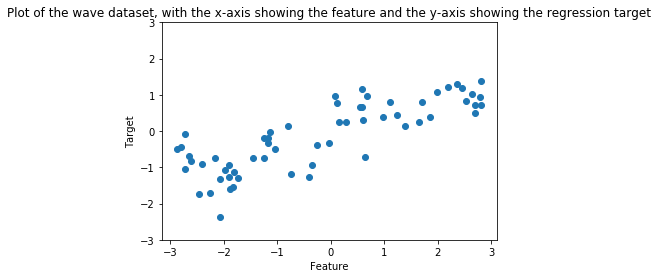

In [2]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_wave(n_samples=60)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Plot of the wave dataset, with the x-axis showing the feature and the y-axis showing the regression target")
plt.show()

We are using this very simple, low-dimensional datasets because we can easily visualize
them—a printed page has two dimensions, so data with more than two features
is hard to show. Any intuition derived from datasets with few features (also called
low-dimensional datasets) might not hold in datasets with many features (high-dimensional
datasets). As long as you keep that in mind, inspecting algorithms on
low-dimensional datasets can be very instructive.

### 1.2 Model

The target is to train an LR with `$y=wx+b$` on this one-dimensional wave dataset, report the values of $w$ and $b$, and then do the visualisation.

Linear regression finds the parameters $w$ and $b$ that minimise
the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values, divided by the number of samples. Linear
regression has no parameters, which is a benefit, but it also has no way to control
model complexity.

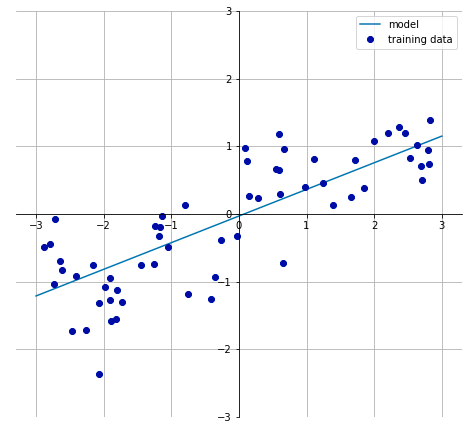

In [52]:
from IPython.display import Image
Image(filename='Fig.png',width = "400",height = "150")

Now, let's start to produce the model you can see in the above figure.

# 2 Linear Regression

## 2.1 Data

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60)

## 2.2 Build the Model

**Q**: Call *train_test_split* on the *wave(n=60)* data with *random_state=42*.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Q**: To build the model on the training set, please call the *fit* method of the LinearRegression() object.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

**Q**: Report the values of parameters $w$ and $b$.  
The “slope” parameter $w$, also called the weight or *coefficient*, are stored in the `*coef_*` attribute, while the offset or *intercept* $b$ is stored in the `*intercept_*` attribute

In [8]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


**Q**: Report the $R^2$ performance on training set and test set, respectively.

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


**Q**: Visualisation with training set and LR model learned above.

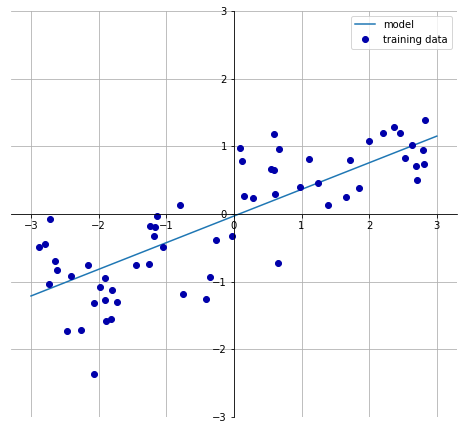

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mglearn.plot_helpers import cm2

line = np.linspace(-3, 3, 100).reshape(-1, 1)
plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line))
plt.plot(X, y, 'o', c=cm2(0))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
#ax.set_xlabel("Feature")
#ax.set_ylabel("Target")
ax.legend(["model", "training data"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

# 3 Multiple Linear Regression

## 3.1 Data 

Import the `Economy.csv` and then look at the data

In [13]:
import pandas as pd
Stock_Market = pd.read_csv(r'Economy.csv')
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
print (df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

Tips: You also need to make sure that the column names specified in the code exactly match with the column names within the CSV file. Otherwise, you’ll get NaN values.

## 3.2 Checking for Linearity

You may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

The Stock_Index_Price (dependent variable) and the Interest_Rate (independent variable); and
The Stock_Index_Price (dependent variable) and the Unemployment_Rate (independent variable)

To perform a quick linearity check, you can use [scatter diagrams](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) (utilising the matplotlib library)

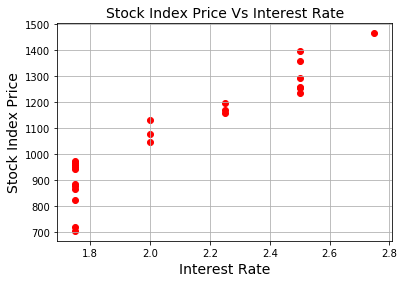

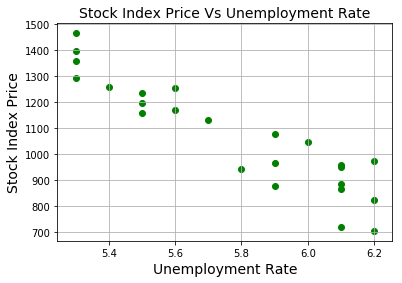

In [5]:
from pandas import DataFrame
import matplotlib.pyplot as plt
  
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

As you can see, a linear relationship exists in both cases:

In the first case, when interest rates go up, the stock index price also goes up
In the second case, when unemployment rates go up, the stock index price goes down (here we still have a linear relationship, but with a negative slope)

## 3.3 Multiple Linear Regression

**Q**: Build a Multiple Linear Regression Model using Economy data with 'Interest_Rate' and'Unemployment_Rate'. The target is the 'Stock_Index_Price'. Report the Intercept and Coefficients.

In [14]:
from pandas import DataFrame
from sklearn import linear_model

X = df[['Interest_Rate','Unemployment_Rate']] 
# here we have 2 variables for multiple regression. 
#If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
#Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]


**Q**: Using the above model to predict the new instance (New_Interest_Rate = 2.75, New_Unemployment_Rate = 5.3)

In [18]:
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3

In [19]:
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]
